In [1]:
import tensorflow as tf

print("Tensorflow version: ", tf.__version__)

if tf.test.gpu_device_name():
    print("Default GPU: {}".format(tf.test.gpu_device_name()))
else:
    print("Not using a GPU - it will take long!!")

Tensorflow version:  2.9.0
Default GPU: /device:GPU:0


In [2]:
from configuration import *

print("DATASET_SIZE", DATASET_SIZE)
print("TRAIN_SIZE", TRAIN_SIZE)
print("TEST_SIZE", TEST_SIZE)

tf.random.set_seed(SEED)

DATASET_SIZE 798
TRAIN_SIZE 679
TEST_SIZE 119


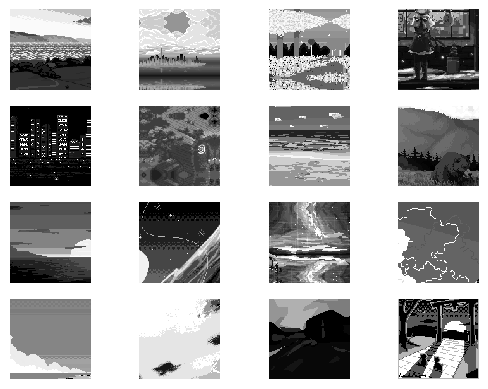

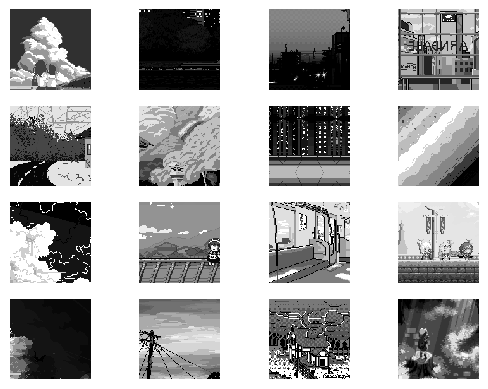

In [3]:
from dataset_utils import load_rgb_dataset
from matplotlib import pyplot as plt

train_ds, test_ds = load_rgb_dataset(DATA_FOLDERS[0], 128)
train_ds = train_ds.shuffle(train_ds.cardinality()).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

def show_image(image):
    denormalized_image = (image + 1) / 2
    plt.imshow(denormalized_image, interpolation="nearest", cmap="gray")

for i, batch in enumerate(train_ds.take(4)):
    for j, image in enumerate(batch):
        plt.subplot(4, 4, i*4+j+1)
        show_image(image)
        plt.axis("off")
plt.show()

for i, batch in enumerate(test_ds.take(4)):
    for j, image in enumerate(batch):
        plt.subplot(4, 4, i*4+j+1)
        show_image(image)
        plt.axis("off")
plt.show()